# RATINGS PREDICTION 

In [1]:
import pandas as pd
RATINGS_PREDICTION=pd.read_csv("RP_webscrap.CSV",sep=",") #reading Avacado.csv file
RATINGS_PREDICTION.head() #Looking into top 5 rows

,Rating,Review,Long_Review
0,1,Received a used router,Package was half sealed by Amazon and on the t...
1,1,DON'T Go for It... in case you don't want to r...,This is a followup of my earlier review\n\nCur...
2,1,Don't buy this router,It can't even cover 500squarefeet Area :/\n\nI...
3,1,Cloudtail providing fake reburbished products ...,The product has stopped working only after 6 m...
4,1,Faulty Product,Router was working fine until i started facing...


# Checking Null Values

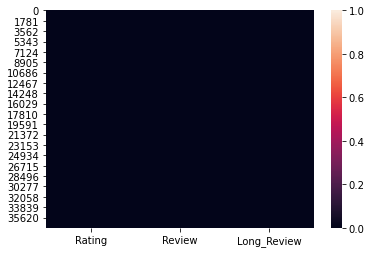

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(RATINGS_PREDICTION.isnull()) #Looking for null values if any, in heatmap

In [3]:
RATINGS_PREDICTION.shape #Shape of the dataset

(37399, 3)

In [4]:
Product = RATINGS_PREDICTION.dropna().reset_index(drop=True) #Dropping Null values

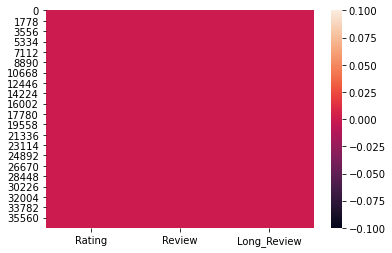

In [5]:
sns.heatmap(Product.isnull()) #Looking for null values if any, in heatmap

In [6]:
Product['Rating'].value_counts() #number of each rating

1    9884
5    8862
4    6733
3    6075
2    5770
Name: Rating, dtype: int64

In [7]:
Product.shape #Checking the shape of our data

(37324, 3)

In [8]:
Product.head()

,Rating,Review,Long_Review
0,1,Received a used router,Package was half sealed by Amazon and on the t...
1,1,DON'T Go for It... in case you don't want to r...,This is a followup of my earlier review\n\nCur...
2,1,Don't buy this router,It can't even cover 500squarefeet Area :/\n\nI...
3,1,Cloudtail providing fake reburbished products ...,The product has stopped working only after 6 m...
4,1,Faulty Product,Router was working fine until i started facing...


In [9]:
Product.isnull().sum()

Rating         0
Review         0
Long_Review    0
dtype: int64

In [10]:
#Converting into lower case
Product['Review']=Product['Review'].str.lower()
Product['Long_Review']=Product['Long_Review'].str.lower()

In [11]:
#adding the length of the review
Product['Review_len']=Product.Review.str.len()
Product['Long_Review_len']=Product.Long_Review.str.len()
Product.head()

,Rating,Review,Long_Review,Review_len,Long_Review_len
0,1,received a used router,package was half sealed by amazon and on the t...,22,383
1,1,don't go for it... in case you don't want to r...,this is a followup of my earlier review\n\ncur...,60,1795
2,1,don't buy this router,it can't even cover 500squarefeet area :/\n\ni...,21,244
3,1,cloudtail providing fake reburbished products ...,the product has stopped working only after 6 m...,72,308
4,1,faulty product,router was working fine until i started facing...,14,589


In [12]:
# Replace email addresses with 'email'
Product['Long_Review']=Product['Long_Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
Product['Long_Review']=Product['Long_Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
Product['Long_Review']=Product['Long_Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [13]:
#Removing the pucntuations
Product['Long_Review']=Product['Long_Review'].str.replace(r'[^\w\d\s]', ' ')
Product['Review']=Product['Review'].str.replace(r'[^\w\d\s]', ' ')
# Replace whitespace between terms with a single space
Product['Long_Review']=Product['Long_Review'].str.replace(r'\s+', ' ')
Product['Review']=Product['Review'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
Product['Long_Review']=Product['Long_Review'].str.replace(r'^\s+|\s+?$', '')
Product['Review']=Product['Review'].str.replace(r'^\s+|\s+?$', '')

In [14]:
#removing noise and repetation of data 
stoplist=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just','should',"should've",'now','d','ll','m','o','re','ve','y']

In [15]:
#add some unnecessary words which are present in reviews
stoplist=stoplist+['printer','cannon','tplink','port','cartridges','customer','smartphone','home','ok','dslr','due','laptop','product','flipkart','u', 'ü', 'ur', '4', '2', 'im', 'doin', 'ure','since','also','hp','windows','day','like','k','upto','later','today','hour','hours','kg','gb','ram','ssd','products','app','watch','phone','online','class','game','student','prodect','printer','amazon','quality','router','use','signal','got','hp','range','printing','custoemr','service','ink','purchase','phone','star','stars','battery','camera','voice','money','headphone','cannon','1500d','received','router','package','wifi','price','cartridge','card','job','print','working','okay','photo','cost','option','modem','paper','bass','tp','link','installation','time','headphone','page','please','take','much','ear','cd','m31','brand','review','charger','go','cloudtail','providing']

In [16]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = stoplist

Product['Long_Review'] = Product['Long_Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
Product['Review'] = Product['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [17]:
Product['Review_len']=Product.Review.str.len()
Product['Long_Review_len']=Product.Long_Review.str.len()
Product.head()

,Rating,Review,Long_Review,Review_len,Long_Review_len
0,1,used,half sealed box tried set via lan username pas...,4,200
1,1,don case don want regret,followup earlier currently immensely regrettin...,24,1057
2,1,don buy,even cover 500squarefeet area not good lot pac...,7,160
3,1,fake reburbished tag genuinity,stopped 6 months taken centre said number box ...,30,125
4,1,faulty,fine started facing problems soon second thoug...,6,283


In [18]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [19]:
Product.head()

,Rating,Review,Long_Review,Review_len,Long_Review_len
0,1,used,half sealed box tried set via lan username pas...,4,200
1,1,don case don want regret,followup earlier currently immensely regrettin...,24,1057
2,1,don buy,even cover 500squarefeet area not good lot pac...,7,160
3,1,fake reburbished tag genuinity,stopped 6 months taken centre said number box ...,30,125
4,1,faulty,fine started facing problems soon second thoug...,6,283


In [20]:
#converting Rating from String into int
import numpy as np
Product['Rating'] = Product['Rating'].astype(np.int64)

# Word Cloud of each Rating

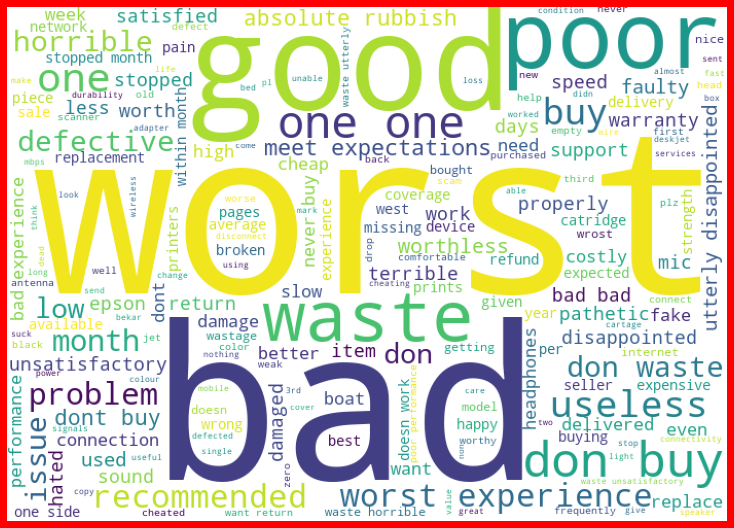

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
#Getting sense of words in Rating 1
one = Product['Review'][Product['Rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

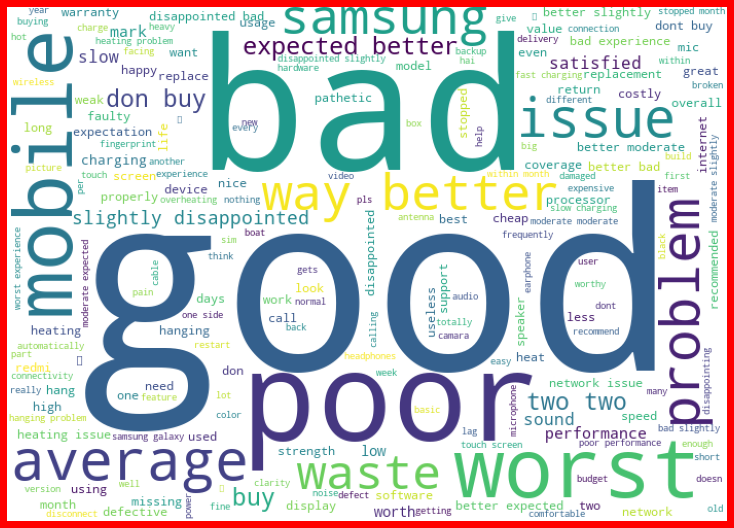

In [22]:
five = Product['Review'][Product['Rating']==2]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

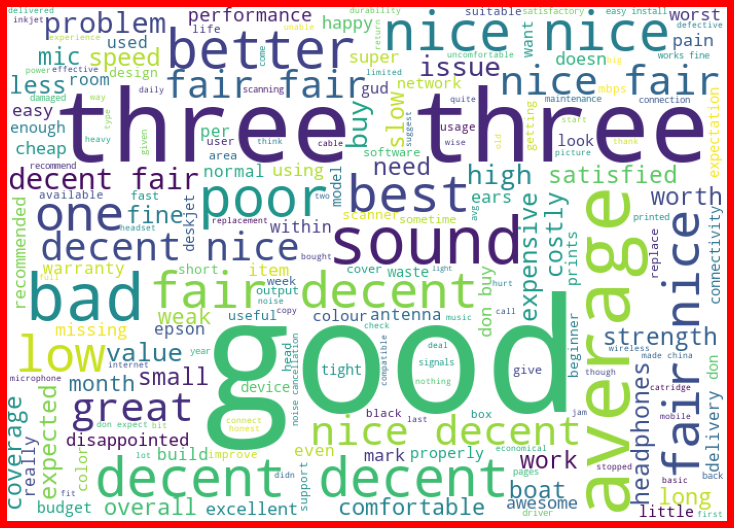

In [23]:
five = Product['Review'][Product['Rating']==3]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

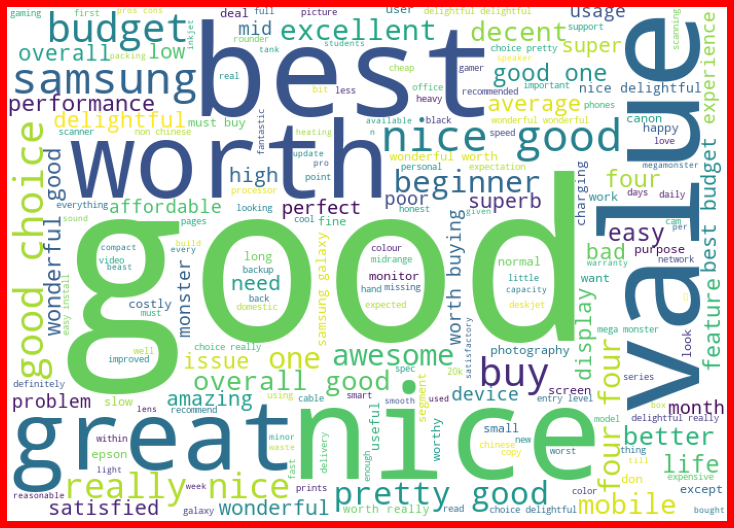

In [24]:
five = Product['Review'][Product['Rating']==4]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

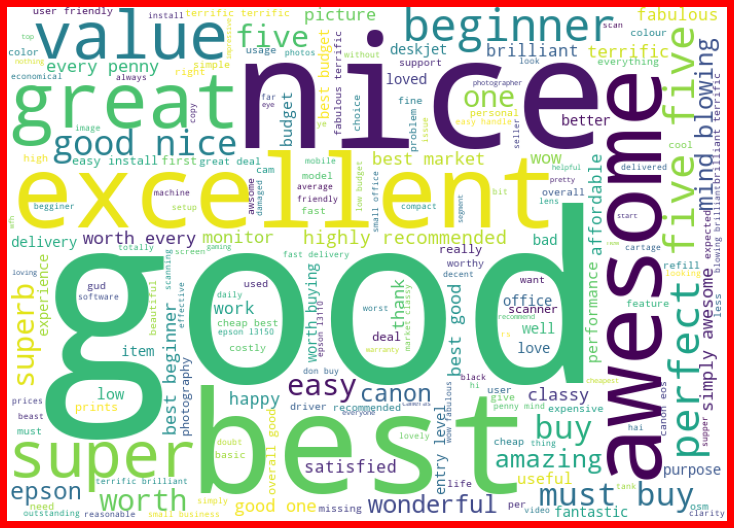

In [25]:
five = Product['Review'][Product['Rating']==5]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

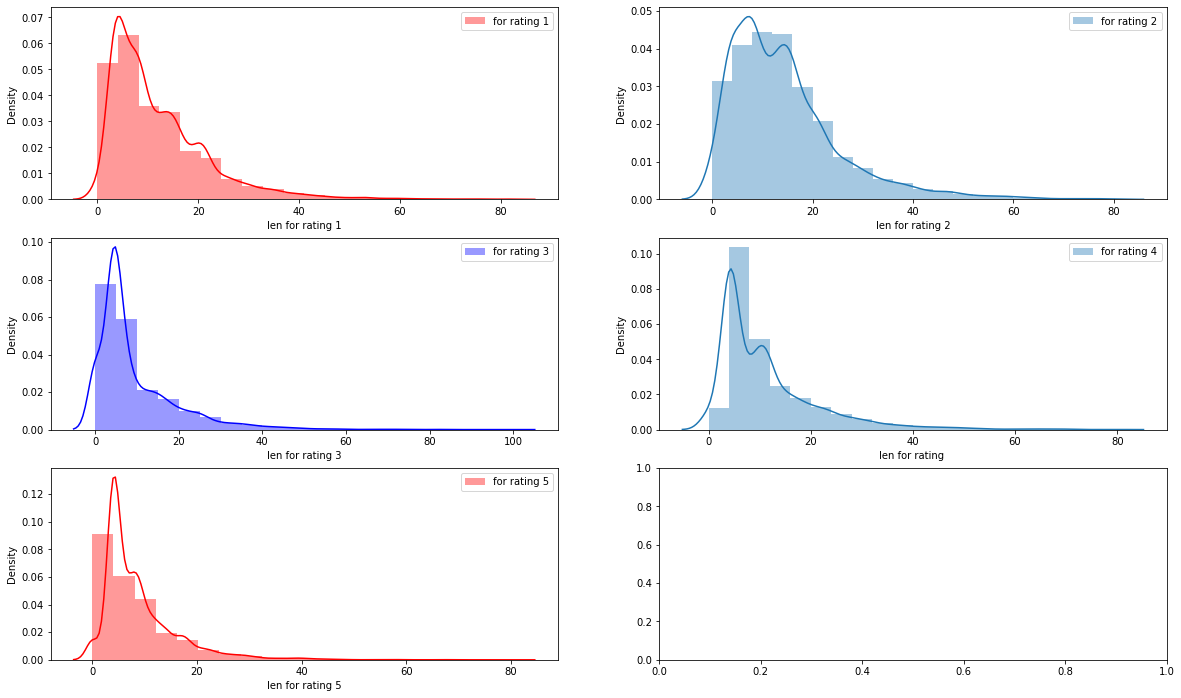

In [26]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(3,2,figsize = (20,12))

sns.distplot(Product[Product['Rating']==1]['Review_len'],bins=20,ax=ax[0][0],label='for rating 1',color='r')

ax[0][0].set_xlabel('len for rating 1')
ax[0][0].legend()

sns.distplot(Product[Product['Rating']==2]['Review_len'],bins=20,ax=ax[0][1],label='for rating 2')
ax[0][1].set_xlabel('len for rating 2')
ax[0][1].legend()

sns.distplot(Product[Product['Rating']==3]['Review_len'],bins=20,ax=ax[1][0],label='for rating 3',color='b')

ax[1][0].set_xlabel('len for rating 3')
ax[1][0].legend()

sns.distplot(Product[Product['Rating']==4]['Review_len'],bins=20,ax=ax[1][1],label='for rating 4')
ax[1][1].set_xlabel('len for rating ')
ax[1][1].legend()
sns.distplot(Product[Product['Rating']==5]['Review_len'],bins=20,ax=ax[2][0],label='for rating 5',color='r')

ax[2][0].set_xlabel('len for rating 5')
ax[2][0].legend()


plt.show()

In [27]:
#Removing some noise from the data
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
punc=string.punctuation#punctuations
corpus = []#remove noise and punctuation
for i in range(0,37324):
    reviews = re.sub("[^a-zA-z\s']", ' ', Product['Review'][i])
    reviews = reviews.lower()
    reviews = reviews.split() 
    reviews = [wordnet.lemmatize(word) for word in reviews if word not in stoplist if word not in punc]
    reviews = ' '.join(reviews)
    corpus.append(reviews)
Product['Review']=corpus
corpus = []#remove noise and punctuation
for i in range(0,37324):
    reviews = re.sub("[^a-zA-z\s']", ' ', Product['Long_Review'][i])
    reviews = reviews.lower()
    reviews = reviews.split() 
    reviews = [wordnet.lemmatize(word) for word in reviews if word not in stoplist if word not in punc]
    reviews = ' '.join(reviews)
    corpus.append(reviews)
Product['Long_Review']=corpus

In [28]:
Product['Review_len']=Product.Review.str.len()
Product['Long_Review_len']=Product.Long_Review.str.len()
Product.head()

,Rating,Review,Long_Review,Review_len,Long_Review_len
0,1,used,half sealed box tried set via lan username pas...,4,200
1,1,don case don want regret,followup earlier currently immensely regrettin...,24,1015
2,1,don buy,even cover squarefeet area not good lot packet...,7,152
3,1,fake reburbished tag genuinity,stopped month taken centre said number box scr...,30,120
4,1,faulty,fine started facing problem soon second though...,6,278


# Checking the Accuracy for Long_Review

In [29]:
# 1. Convert text into vectors using TF-IDF
# 2. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(Product['Long_Review'])

x = features
y = Product['Rating']

In [30]:
print("shape of x is :",x.shape)
print("shape of y is :",y.shape)

shape of x is : (37324, 13471)
shape of y is : (37324,)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,15):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.5961778889087337  on Random_state  11


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3)]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)  
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.5961778889087337
[[2516  134  190   29   92]
 [ 688  616  209  116   65]
 [ 570  111  643   94  391]
 [ 180  101  153  732  887]
 [ 217   18  121  156 2169]]
              precision    recall  f1-score   support

           1       0.60      0.85      0.71      2961
           2       0.63      0.36      0.46      1694
           3       0.49      0.36      0.41      1809
           4       0.65      0.36      0.46      2053
           5       0.60      0.81      0.69      2681

    accuracy                           0.60     11198
   macro avg       0.59      0.55      0.55     11198
weighted avg       0.60      0.60      0.57     11198

[0.43362358 0.48238446 0.49845948 0.61352981 0.63946945]
0.5334933548413497
Difference between Accuracy score and cross validatio score is -  0.06268

# Checking the Accuracy for Review

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(Product['Review'])

x = features
y = Product['Rating']

In [34]:
print("shape of x is :",x.shape)
print("shape of y is :",y.shape)

shape of x is : (37324, 4771)
shape of y is : (37324,)


In [35]:
m = RandomForestClassifier()
maxAccu=0
maxRS=0
for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    m.fit(x_train,y_train)
    predrf = m.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maxAccu = " + str(acc) + "   i = "+ str(i))

maxAccu = 0.6181460975174138   i = 9


In [36]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3)]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)  
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.6165386676192177
[[2358  268  230   43   83]
 [ 589  775  222   72   74]
 [ 282  149  908   93  413]
 [ 126  103  182  776  811]
 [ 104   36  206  208 2087]]
              precision    recall  f1-score   support

           1       0.68      0.79      0.73      2982
           2       0.58      0.45      0.51      1732
           3       0.52      0.49      0.51      1845
           4       0.65      0.39      0.49      1998
           5       0.60      0.79      0.68      2641

    accuracy                           0.62     11198
   macro avg       0.61      0.58      0.58     11198
weighted avg       0.62      0.62      0.60     11198

[0.57749498 0.61795044 0.55204287 0.56784997 0.46275456]
0.555618560068458
Difference between Accuracy score and cross validatio score is -  0.060920

As we can see the F1 score and accuracy of SVC for Review is high. So we do Hyperparameter tuning for SVC.

# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=  16.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.552, total=  15.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.558, total=  15.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=  15.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.566, total=  18.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.520, total=  20.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=  19.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.507, total=  20.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 38.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [40]:
grid_predictions = grid.predict(x_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.67      0.84      0.74      2982
           2       0.60      0.45      0.51      1732
           3       0.58      0.47      0.52      1845
           4       0.68      0.41      0.51      1998
           5       0.61      0.80      0.69      2641

    accuracy                           0.63     11198
   macro avg       0.63      0.59      0.60     11198
weighted avg       0.63      0.63      0.62     11198



# Saving the Model

In [43]:
import joblib
joblib.dump(grid.best_estimator_,"Rating.obj")
SVR_from_joblib=joblib.load("Rating.obj")
Predicted = SVR_from_joblib.predict(x_test)